In [1]:
import pandas as pd
df=pd.read_csv('SaYoPillow.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sh      630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [3]:
df.corr()

,sr,rr,t,lm,bo,rem,sh,hr,sl
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sh,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
sl,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [4]:
df.describe()

,sr,rr,t,lm,bo,rem,sh,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


<Axes: >

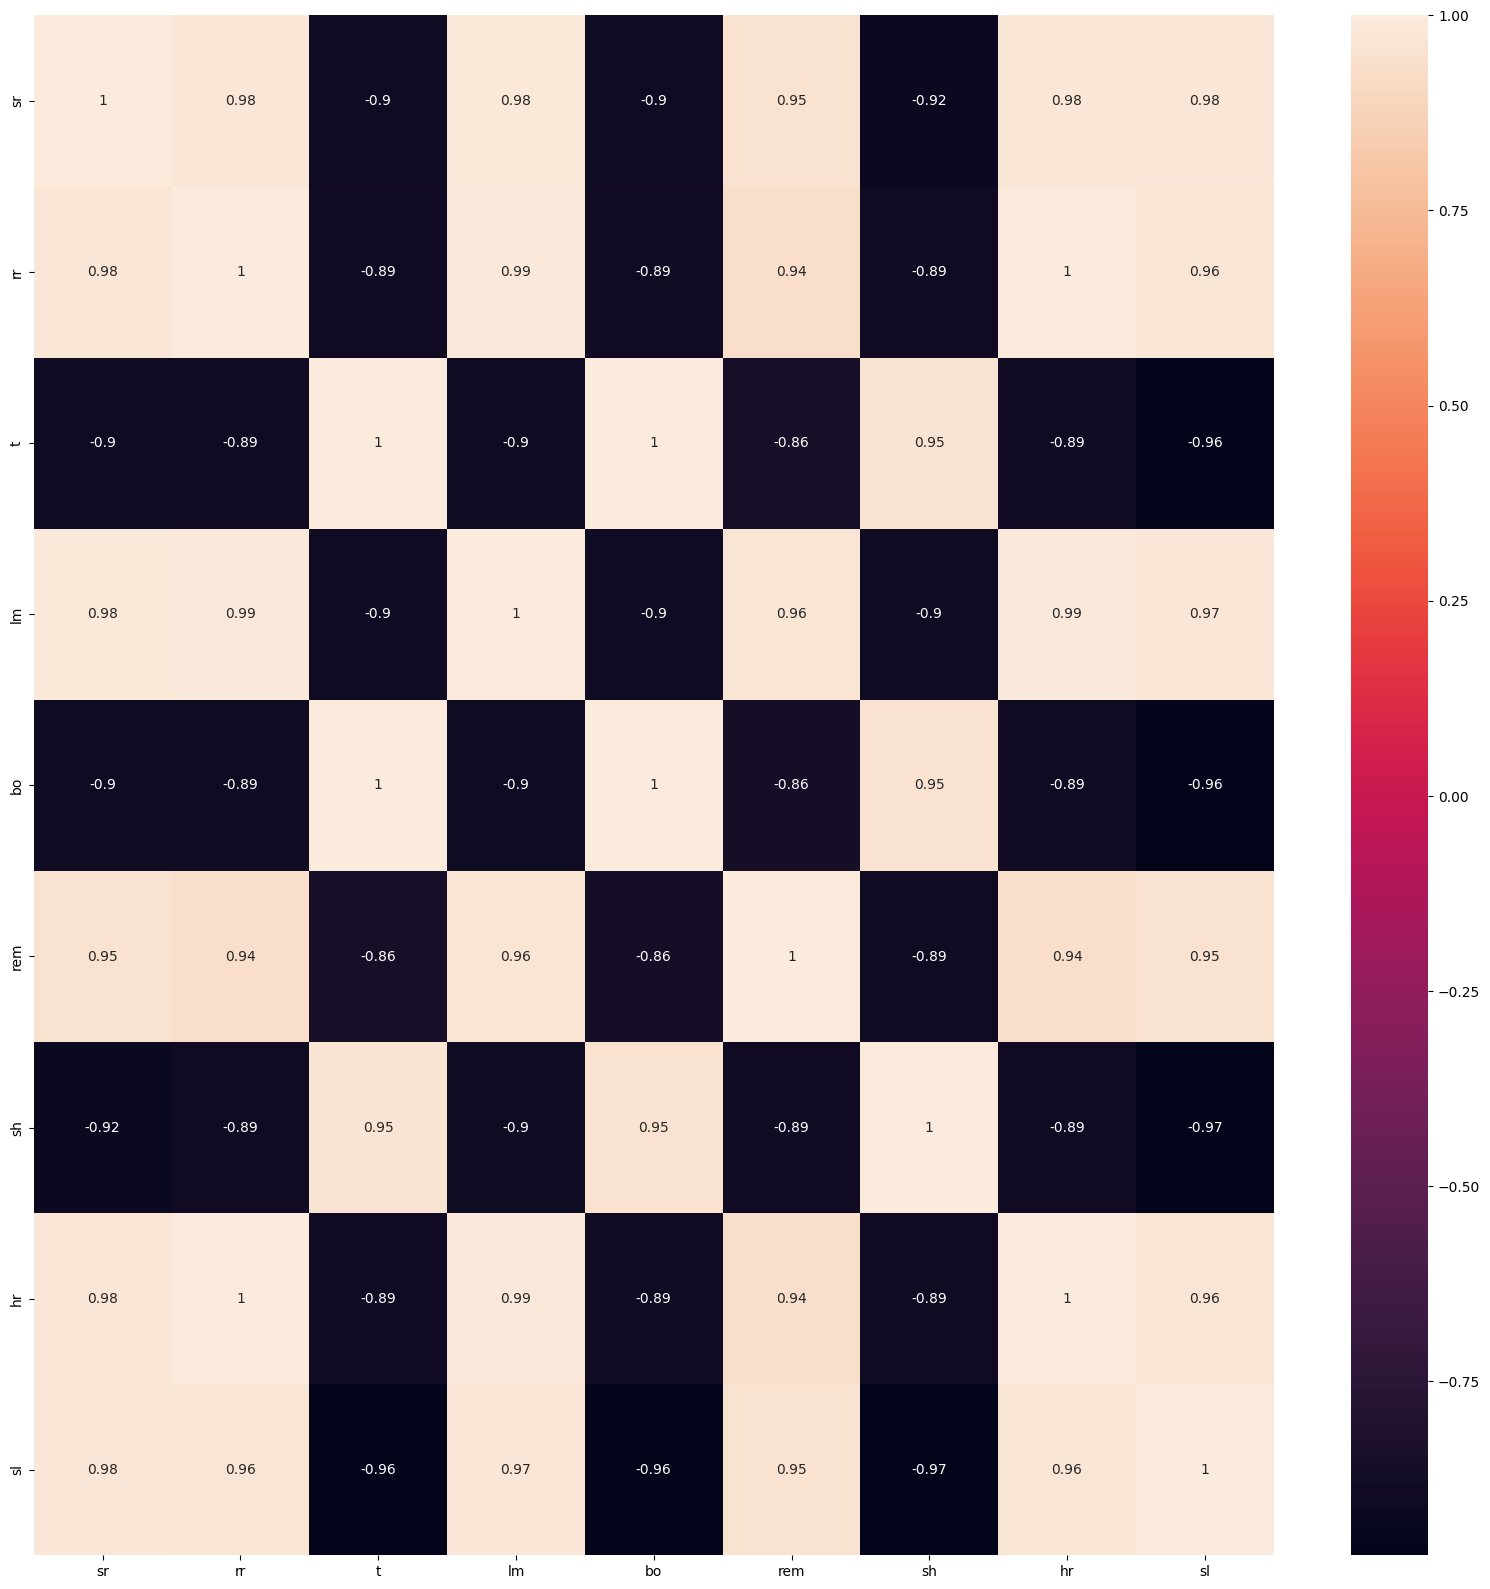

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

## MODELLING

Pycaret only supports python 3.9, 3.10, 3.11

In [10]:
!pip install --upgrade pycaret


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: c:\Users\Dell\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [11]:
from pycaret.classification import *

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
setup(df,target='sl')

,Description,Value
0,Session id,4041
1,Target,sl
2,Target type,Multiclass
3,Original data shape,"(630, 9)"
4,Transformed data shape,"(630, 9)"
5,Transformed train set shape,"(441, 9)"
6,Transformed test set shape,"(189, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7540
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0790
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0880
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0390
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2680
rf,Random Forest Classifier,0.9955,1.0000,0.9955,0.9960,0.9955,0.9943,0.9944,0.4830
lightgbm,Light Gradient Boosting Machine,0.9910,0.9990,0.9910,0.9917,0.9910,0.9888,0.9889,1.6570
dt,Decision Tree Classifier,0.9887,0.9929,0.9887,0.9898,0.9887,0.9859,0.9862,0.0940
gbc,Gradient Boosting Classifier,0.9887,0.0000,0.9887,0.9898,0.9887,0.9859,0.9862,1.0490
xgboost,Extreme Gradient Boosting,0.9842,0.9967,0.9842,0.9862,0.9840,0.9802,0.9808,0.1320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4041, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(["sl"], axis=1)
y = df['sl']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
